In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
from pandas.core.dtypes.common import classes
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/finaldataset', output="char_output_extended", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 5518 files [02:07, 43.17 files/s]


In [6]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
get_ipython().run_line_magic('matplotlib', 'inline')

In [7]:
from tensorflow.keras.optimizers import SGD,Adam
import tensorflow as tf 
import keras
import numpy as np
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from six.moves import cPickle as Pickle
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [8]:
IMG_WIDTH=32
IMG_HEIGHT=32
img_folder=r'/content/char_output_extended/train'

In [9]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'/content/char_output_extended/train')

In [10]:
IMG_WIDTH=32
IMG_HEIGHT=32
img_folder=r'/content/char_output_extended/test'

In [11]:
def create_dataset(img_folder):
   
    img_data_test_array=[]
    class_name_test=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_test_array.append(image)
            class_name_test.append(dir1)
    return img_data_test_array, class_name_test
# extract the image array and class name
img_test_data, class_name_test =create_dataset(r'/content/char_output_extended/test')

In [12]:
target_dict_test={k: v for v, k in enumerate(np.unique(class_name_test))}
target_dict_test

{'Aa': 0,
 'Aaaa': 1,
 'aaha': 2,
 'am': 3,
 'anna': 4,
 'bha': 5,
 'cha': 6,
 'dha': 7,
 'dhaa': 8,
 'ee': 9,
 'ga': 10,
 'ha': 11,
 'ja': 12,
 'ka': 13,
 'la': 14,
 'ma': 15,
 'na': 16,
 'pa': 17,
 'ra': 18,
 'sya': 19,
 'tha': 20,
 'va': 21,
 'ya': 22,
 'yaotthu': 23,
 'ye': 24}

In [13]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict


{'Aa': 0,
 'Aaaa': 1,
 'aaha': 2,
 'am': 3,
 'anna': 4,
 'bha': 5,
 'cha': 6,
 'dha': 7,
 'dhaa': 8,
 'ee': 9,
 'ga': 10,
 'ha': 11,
 'ja': 12,
 'ka': 13,
 'la': 14,
 'ma': 15,
 'na': 16,
 'pa': 17,
 'ra': 18,
 'sya': 19,
 'tha': 20,
 'va': 21,
 'ya': 22,
 'yaotthu': 23,
 'ye': 24}

In [14]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [15]:
target_test_val=  [target_dict_test[class_name_test[i]] for i in range(len(class_name_test))]

In [16]:
IMG_WIDTH=32
IMG_HEIGHT=32
img_folder=r'/content/char_output_extended/val'

In [17]:
def create_dataset(img_folder):
   
    img_data_vali_array=[]
    class_name_vali=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_vali_array.append(image)
            class_name_vali.append(dir1)
    return img_data_vali_array, class_name_vali
# extract the image array and class name
img_vali_data, class_name_vali =create_dataset(r'/content/char_output_extended/val')

In [18]:
target_dict_vali={k: v for v, k in enumerate(np.unique(class_name_vali))}
target_dict_vali

{'Aa': 0,
 'Aaaa': 1,
 'aaha': 2,
 'am': 3,
 'anna': 4,
 'bha': 5,
 'cha': 6,
 'dha': 7,
 'dhaa': 8,
 'ee': 9,
 'ga': 10,
 'ha': 11,
 'ja': 12,
 'ka': 13,
 'la': 14,
 'ma': 15,
 'na': 16,
 'pa': 17,
 'ra': 18,
 'sya': 19,
 'tha': 20,
 'va': 21,
 'ya': 22,
 'yaotthu': 23,
 'ye': 24}

In [19]:
target_vali_val=  [target_dict_vali[class_name_vali[i]] for i in range(len(class_name_vali))]

In [20]:
vali_data=np.array(img_vali_data, np.float32)
vali_labels=np.array(list(map(int,target_vali_val)), np.float32)
vali_labels=to_categorical(vali_labels)
print(vali_labels.shape)
print(vali_data.shape)

(539, 25)
(539, 32, 32)


In [21]:
import numpy as np

vali_data = np.expand_dims(vali_data[..., 0], axis=-1)
print(vali_labels.shape)
print(vali_data.shape)

(539, 25)
(539, 32, 1)


In [22]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set the directory containing the images
data_directory = "/content/drive/MyDrive/finaldataset"

# Set the number of classes and other hyperparameters
num_classes = 25
image_size = (32, 32)
batch_size = 32
epochs = 15

# Initialize the ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the training data
train_generator = data_generator.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load the validation data
validation_generator = data_generator.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Save the trained model
model.save('trained_model.h5')


Found 4519 images belonging to 25 classes.
Found 1119 images belonging to 25 classes.
Epoch 1/15
142/142 [==============================] - 23s 84ms/step - loss: 2.6034 - accuracy: 0.2242 - val_loss: 1.7725 - val_accuracy: 0.3959
Epoch 2/15
142/142 [==============================] - 9s 62ms/step - loss: 1.2952 - accuracy: 0.5771 - val_loss: 1.0932 - val_accuracy: 0.6300
Epoch 3/15
142/142 [==============================] - 8s 60ms/step - loss: 0.8907 - accuracy: 0.7192 - val_loss: 0.8695 - val_accuracy: 0.7265
Epoch 4/15
142/142 [==============================] - 9s 62ms/step - loss: 0.7045 - accuracy: 0.7814 - val_loss: 0.8760 - val_accuracy: 0.7078
Epoch 5/15
142/142 [==============================] - 10s 70ms/step - loss: 0.5875 - accuracy: 0.8139 - val_loss: 0.6544 - val_accuracy: 0.7962
Epoch 6/15
142/142 [==============================] - 9s 61ms/step - loss: 0.4883 - accuracy: 0.8486 - val_loss: 0.8601 - val_accuracy: 0.7355
Epoch 7/15
142/142 [==============================] - 

In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the saved model
saved_model_path = 'trained_model.h5'
model = load_model(saved_model_path)

# Load and preprocess the image
image_path = '/content/char_output_extended/test/Aa/211.jpg'
img = image.load_img(image_path, target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make the prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Print the predicted class
print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 269ms/step
Predicted Class: 0


In [24]:
from keras.utils.vis_utils import plot_model


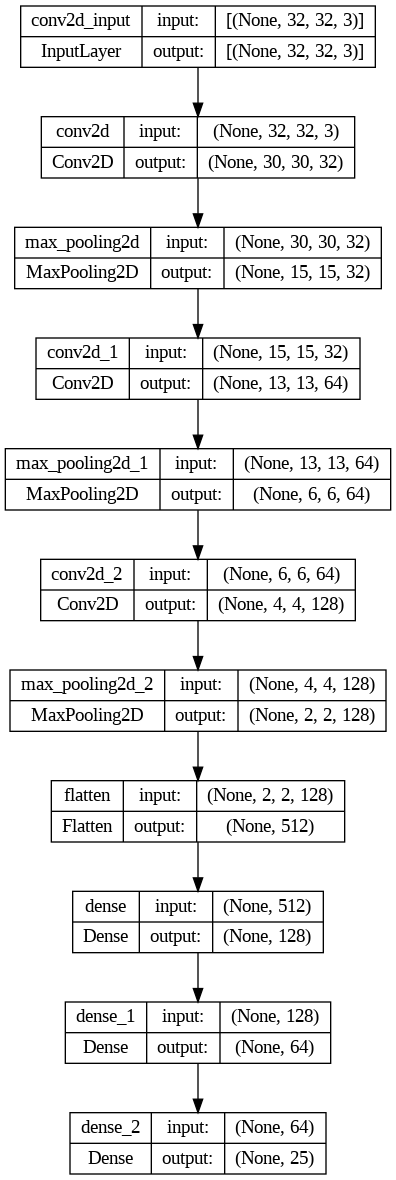

In [25]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


Epoch 1/15
142/142 [==============================] - 11s 65ms/step - loss: 0.1838 - accuracy: 0.9436 - val_loss: 0.6773 - val_accuracy: 0.8159
Epoch 2/15
142/142 [==============================] - 8s 59ms/step - loss: 0.1552 - accuracy: 0.9493 - val_loss: 0.7456 - val_accuracy: 0.8114
Epoch 3/15
142/142 [==============================] - 10s 71ms/step - loss: 0.1199 - accuracy: 0.9606 - val_loss: 0.7075 - val_accuracy: 0.8186
Epoch 4/15
142/142 [==============================] - 9s 63ms/step - loss: 0.1037 - accuracy: 0.9686 - val_loss: 0.7130 - val_accuracy: 0.8391
Epoch 5/15
142/142 [==============================] - 8s 58ms/step - loss: 0.1258 - accuracy: 0.9566 - val_loss: 0.7470 - val_accuracy: 0.8320
Epoch 6/15
142/142 [==============================] - 10s 70ms/step - loss: 0.1101 - accuracy: 0.9642 - val_loss: 0.7421 - val_accuracy: 0.8400
Epoch 7/15
142/142 [==============================] - 9s 63ms/step - loss: 0.0837 - accuracy: 0.9723 - val_loss: 0.7364 - val_accuracy: 0.8

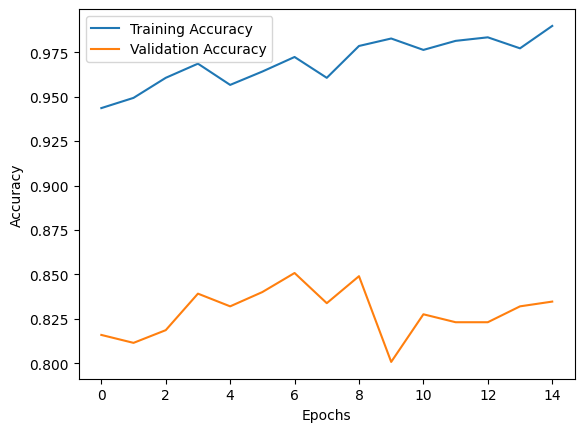

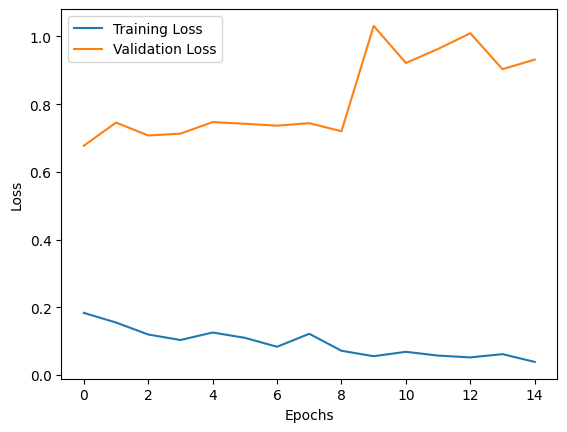

In [26]:
import matplotlib.pyplot as plt

# Train the model and obtain the history object
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Get the training accuracy and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training loss and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy curves
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [30]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Set the directory containing the images
data_directory = "/content/drive/MyDrive/finaldataset"

# Set the number of classes and other hyperparameters
num_classes = 25
image_size = (32, 32)
batch_size = 32
epochs = 30

# Initialize the ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the training data
train_generator = data_generator.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load the validation data
validation_generator = data_generator.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=[early_stopping])

# Save the trained model
model.save('trained_model_earlystopping.h5')


Found 4519 images belonging to 25 classes.
Found 1119 images belonging to 25 classes.
Epoch 1/30
142/142 [==============================] - 11s 62ms/step - loss: 2.8352 - accuracy: 0.1821 - val_loss: 2.0180 - val_accuracy: 0.3950
Epoch 2/30
142/142 [==============================] - 8s 57ms/step - loss: 1.3860 - accuracy: 0.5599 - val_loss: 1.1127 - val_accuracy: 0.6381
Epoch 3/30
142/142 [==============================] - 8s 59ms/step - loss: 0.8510 - accuracy: 0.7287 - val_loss: 0.8999 - val_accuracy: 0.6890
Epoch 4/30
142/142 [==============================] - 9s 66ms/step - loss: 0.6712 - accuracy: 0.7918 - val_loss: 0.7890 - val_accuracy: 0.7507
Epoch 5/30
142/142 [==============================] - 8s 57ms/step - loss: 0.5631 - accuracy: 0.8270 - val_loss: 0.7903 - val_accuracy: 0.7560
Epoch 6/30
142/142 [==============================] - 9s 63ms/step - loss: 0.4876 - accuracy: 0.8493 - val_loss: 0.6621 - val_accuracy: 0.7927
Epoch 7/30
142/142 [==============================] - 9

Epoch 1/30
142/142 [==============================] - 8s 60ms/step - loss: 0.2945 - accuracy: 0.9130 - val_loss: 0.6243 - val_accuracy: 0.8168
Epoch 2/30
142/142 [==============================] - 9s 60ms/step - loss: 0.2678 - accuracy: 0.9179 - val_loss: 0.6240 - val_accuracy: 0.8195
Epoch 3/30
142/142 [==============================] - 8s 59ms/step - loss: 0.2493 - accuracy: 0.9234 - val_loss: 0.6279 - val_accuracy: 0.8097
Epoch 4/30
142/142 [==============================] - 8s 57ms/step - loss: 0.2243 - accuracy: 0.9327 - val_loss: 0.6314 - val_accuracy: 0.8231
Epoch 5/30
142/142 [==============================] - 8s 58ms/step - loss: 0.2043 - accuracy: 0.9385 - val_loss: 0.7548 - val_accuracy: 0.8025
Training Accuracy: 0.9384819865226746
Validation Accuracy: 0.8025022149085999
Training Loss: 0.20425784587860107
Validation Loss: 0.7548433542251587


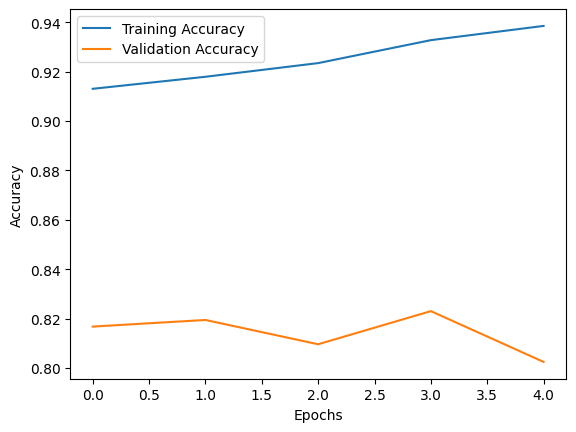

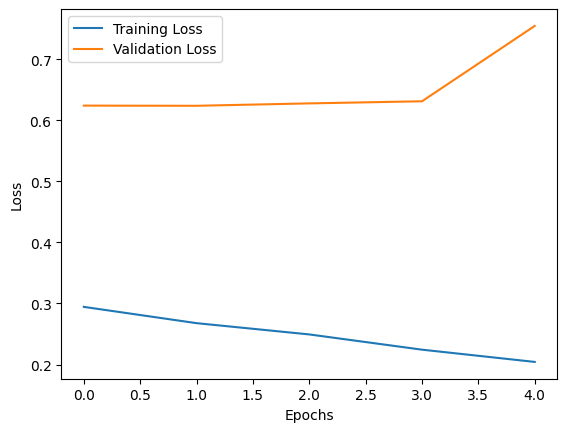

In [31]:
import matplotlib.pyplot as plt

# Train the model and obtain the history object
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=[early_stopping])

# Get the training accuracy and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training loss and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Print the training accuracy and validation accuracy
print("Training Accuracy:", train_acc[-1])
print("Validation Accuracy:", val_acc[-1])

# Print the training loss and validation loss
print("Training Loss:", train_loss[-1])
print("Validation Loss:", val_loss[-1])

# Plot the accuracy curves
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [33]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import regularizers

# Set the directory containing the images
data_directory = "/content/drive/MyDrive/finaldataset"

# Set the number of classes and other hyperparameters
num_classes = 25
image_size = (32, 32)
batch_size = 32
epochs = 75

# Initialize the ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the training data
train_generator = data_generator.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load the validation data
validation_generator = data_generator.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build the CNN model with L1 and L2 regularization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3), 
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Save the trained model
model.save('trained_model_l1l2.h5')


Found 4519 images belonging to 25 classes.
Found 1119 images belonging to 25 classes.
Epoch 1/75
142/142 [==============================] - 11s 63ms/step - loss: 3.7934 - accuracy: 0.0872 - val_loss: 3.1141 - val_accuracy: 0.0965
Epoch 2/75
142/142 [==============================] - 9s 67ms/step - loss: 3.0962 - accuracy: 0.0925 - val_loss: 3.0611 - val_accuracy: 0.0831
Epoch 3/75
142/142 [==============================] - 8s 57ms/step - loss: 3.0645 - accuracy: 0.0898 - val_loss: 3.0487 - val_accuracy: 0.0965
Epoch 4/75
142/142 [==============================] - 8s 58ms/step - loss: 3.0511 - accuracy: 0.0934 - val_loss: 3.0480 - val_accuracy: 0.0849
Epoch 5/75
142/142 [==============================] - 9s 65ms/step - loss: 3.0463 - accuracy: 0.0952 - val_loss: 3.0382 - val_accuracy: 0.0965
Epoch 6/75
142/142 [==============================] - 8s 56ms/step - loss: 3.0404 - accuracy: 0.0960 - val_loss: 3.0318 - val_accuracy: 0.0965
Epoch 7/75
142/142 [==============================] - 9

Epoch 1/75
142/142 [==============================] - 8s 59ms/step - loss: 3.0274 - accuracy: 0.0960 - val_loss: 3.0202 - val_accuracy: 0.0965
Epoch 2/75
142/142 [==============================] - 9s 64ms/step - loss: 3.0273 - accuracy: 0.0960 - val_loss: 3.0204 - val_accuracy: 0.0965
Epoch 3/75
142/142 [==============================] - 8s 56ms/step - loss: 3.0280 - accuracy: 0.0960 - val_loss: 3.0200 - val_accuracy: 0.0965
Epoch 4/75
142/142 [==============================] - 8s 59ms/step - loss: 3.0275 - accuracy: 0.0960 - val_loss: 3.0213 - val_accuracy: 0.0965
Epoch 5/75
142/142 [==============================] - 8s 57ms/step - loss: 3.0274 - accuracy: 0.0960 - val_loss: 3.0201 - val_accuracy: 0.0965
Epoch 6/75
142/142 [==============================] - 8s 58ms/step - loss: 3.0272 - accuracy: 0.0960 - val_loss: 3.0200 - val_accuracy: 0.0965
Epoch 7/75
142/142 [==============================] - 8s 59ms/step - loss: 3.0273 - accuracy: 0.0960 - val_loss: 3.0207 - val_accuracy: 0.0965

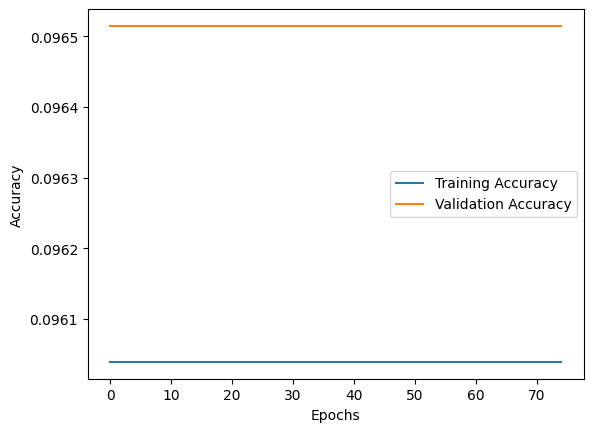

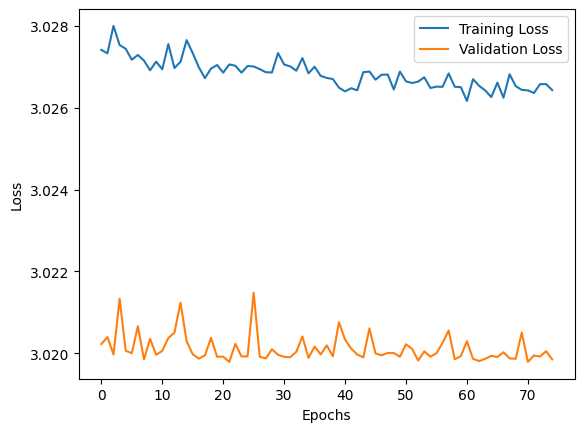

In [34]:
import matplotlib.pyplot as plt

# Train the model and obtain the history object
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Get the training accuracy and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training loss and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Print the training accuracy and validation accuracy
print("Training Accuracy:", train_acc[-1])
print("Validation Accuracy:", val_acc[-1])

# Print the training loss and validation loss
print("Training Loss:", train_loss[-1])
print("Validation Loss:", val_loss[-1])

# Plot the accuracy curves
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Found 4519 images belonging to 25 classes.
Found 1119 images belonging to 25 classes.
Epoch 1/50
142/142 [==============================] - 14s 85ms/step - loss: 12.6533 - accuracy: 0.0881 - val_loss: 3.3430 - val_accuracy: 0.0831
Epoch 2/50
142/142 [==============================] - 12s 82ms/step - loss: 3.2952 - accuracy: 0.0907 - val_loss: 3.2671 - val_accuracy: 0.0965
Epoch 3/50
142/142 [==============================] - 12s 84ms/step - loss: 3.2602 - accuracy: 0.0905 - val_loss: 3.2364 - val_accuracy: 0.0965
Epoch 4/50
142/142 [==============================] - 12s 82ms/step - loss: 3.2377 - accuracy: 0.0936 - val_loss: 3.2212 - val_accuracy: 0.0965
Epoch 5/50
142/142 [==============================] - 11s 79ms/step - loss: 3.2140 - accuracy: 0.0940 - val_loss: 3.1949 - val_accuracy: 0.0965
Epoch 6/50
142/142 [==============================] - 12s 84ms/step - loss: 3.1885 - accuracy: 0.0960 - val_loss: 3.1717 - val_accuracy: 0.0965
Epoch 7/50
142/142 [=============================

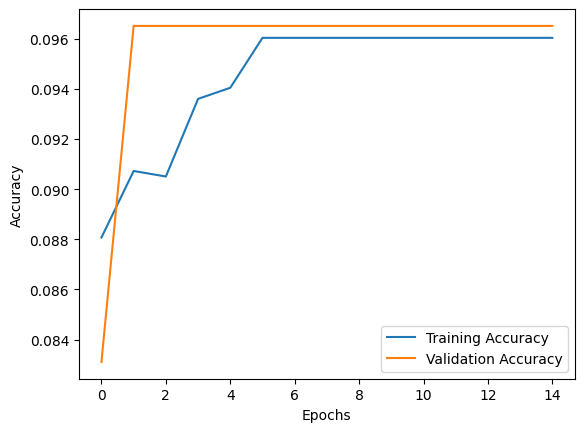

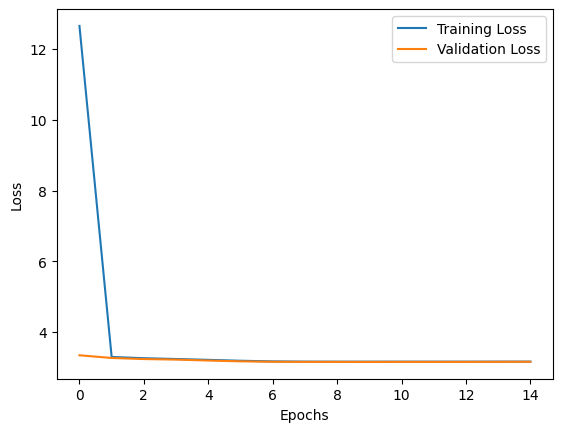

In [35]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Set the directory containing the images
data_directory = "/content/drive/MyDrive/finaldataset"

# Set the number of classes and other hyperparameters
num_classes = 25
image_size = (32, 32)
batch_size = 32
epochs = 50

# Initialize the ImageDataGenerator with data augmentation
data_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Load the training data with data augmentation
train_generator = data_generator.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load the validation data without data augmentation
validation_generator = data_generator.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build the CNN model with L1 and L2 regularization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l1_l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1_l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1_l2(0.01)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(0.01)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=[early_stopping])

# Get the training accuracy and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training loss and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Print the training accuracy and validation accuracy
print("Training Accuracy:", train_acc[-1])
print("Validation Accuracy:", val_acc[-1])

# Print the training loss and validation loss
print("Training Loss:", train_loss[-1])
print("Validation Loss:", val_loss[-1])

# Plot the accuracy curves
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Found 4519 images belonging to 25 classes.
Found 1119 images belonging to 25 classes.
Epoch 1/100
142/142 [==============================] - 14s 86ms/step - loss: 3.0603 - accuracy: 0.0927 - val_loss: 3.0141 - val_accuracy: 0.0965
Epoch 2/100
142/142 [==============================] - 12s 85ms/step - loss: 3.0138 - accuracy: 0.1087 - val_loss: 2.9599 - val_accuracy: 0.1296
Epoch 3/100
142/142 [==============================] - 13s 89ms/step - loss: 2.5620 - accuracy: 0.2326 - val_loss: 2.3614 - val_accuracy: 0.2395
Epoch 4/100
142/142 [==============================] - 13s 89ms/step - loss: 2.1013 - accuracy: 0.3410 - val_loss: 1.9421 - val_accuracy: 0.3914
Epoch 5/100
142/142 [==============================] - 15s 109ms/step - loss: 1.8657 - accuracy: 0.4087 - val_loss: 1.9158 - val_accuracy: 0.4021
Epoch 6/100
142/142 [==============================] - 13s 89ms/step - loss: 1.7409 - accuracy: 0.4412 - val_loss: 1.8177 - val_accuracy: 0.4272
Epoch 7/100
142/142 [======================

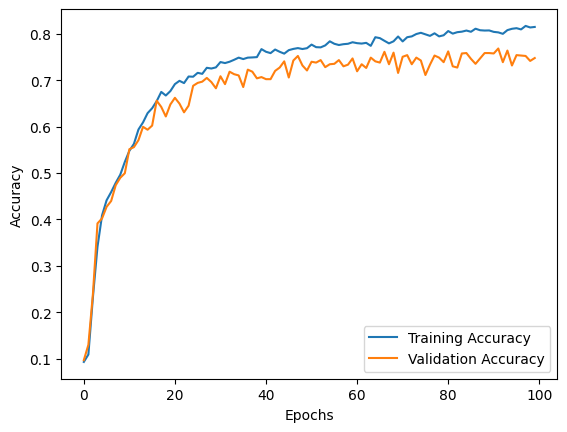

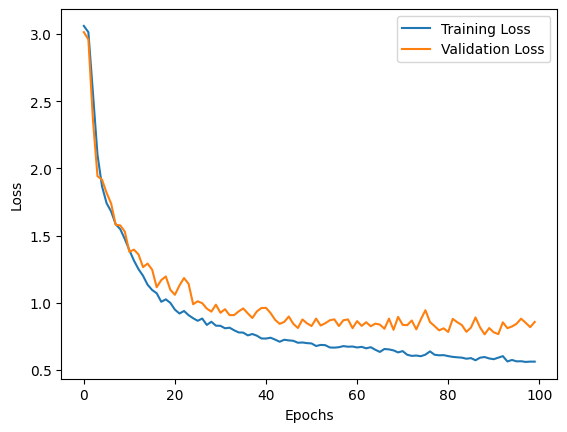

In [39]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Set the directory containing the images
data_directory = "/content/drive/MyDrive/finaldataset"

# Set the number of classes and other hyperparameters
num_classes = 25
image_size = (32, 32)
batch_size = 32
epochs = 100

# Initialize the ImageDataGenerator with data augmentation
data_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Load the training data with data augmentation
train_generator = data_generator.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load the validation data without data augmentation
validation_generator = data_generator.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Save the trained model with data augmentation
model.save("data_augmented_model.h5")

# Get the training accuracy and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training loss and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy curves
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [40]:
import numpy as np
from sklearn.metrics import classification_report

# Predict the labels for the validation data
validation_images, validation_labels = validation_generator.next()
y_pred = model.predict(validation_images)
y_pred = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to class indices
y_true = np.argmax(validation_labels, axis=1)

# Calculate precision, recall, and F1-score
report = classification_report(y_true, y_pred)
print(report)


1/1 [==============================] - 0s 76ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          15       0.50      1.00      0.67         1
          16       1.00      0.50      0.67         2
          18       0.80      1.00      0.89         4
          20       0.50      0.50      0.50         2
          21       0.80      0.80      0.80         5
          22       1.00      0.75      0.86         4
          24       1.00      1.00      1.00         2

    accuracy                           0.84        32
   macro avg       0.76      0.80      0.75        32
weighted avg       0.85      0.84      0.83        32



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
import numpy as np
from sklearn.metrics import classification_report

# Generate predictions for the validation data
validation_generator = data_generator.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Ensure consistent ordering of predictions and labels
)

# Predict the labels for the validation data
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels from the validation generator
y_true = validation_generator.classes

# Get the class labels
class_labels = list(validation_generator.class_indices.keys())

# Calculate precision, recall, and F1-score
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)


Found 1119 images belonging to 25 classes.
35/35 [==============================] - 2s 69ms/step
              precision    recall  f1-score   support

          Aa       0.71      0.76      0.74        33
        Aaaa       0.67      0.22      0.33        18
        aaha       0.79      0.96      0.86        23
          am       0.85      0.98      0.91       108
        anna       0.97      0.90      0.94        41
         bha       0.50      0.70      0.58        10
         cha       0.60      0.32      0.42        28
         dha       0.63      0.59      0.61        74
        dhaa       0.77      0.45      0.57        22
          ee       0.77      0.85      0.81        27
          ga       0.84      0.84      0.84        43
          ha       0.90      0.95      0.93        20
          ja       0.84      0.80      0.82        20
          ka       0.64      0.84      0.73        32
          la       0.58      0.92      0.71        12
          ma       0.93      0.91     

In [42]:
import numpy as np
from sklearn.metrics import classification_report

# Predict the labels for the training data
train_images, train_labels = train_generator.next()
y_pred_train = model.predict(train_images)
y_pred_train = np.argmax(y_pred_train, axis=1)

# Convert one-hot encoded labels to class indices
y_true_train = np.argmax(train_labels, axis=1)

# Calculate precision, recall, and F1-score
report_train = classification_report(y_true_train, y_pred_train)
print(report_train)


1/1 [==============================] - 0s 95ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1
           3       1.00      0.80      0.89         5
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      0.50      0.67         2
          17       0.00      0.00      0.00         1
          18       0.75      1.00      0.86         3
          19       0.75      0.75      0.75         4
          21       1.00      1.00      1.00         1
          24       0.75      1.00      0.86         3

    accuracy                

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
import numpy as np
from sklearn.metrics import classification_report

# Predict the labels for the training data
train_images, train_labels = train_generator.next()
y_pred_train = model.predict(train_images)
y_pred_train = np.argmax(y_pred_train, axis=1)

# Convert one-hot encoded labels to class indices
y_true_train = np.argmax(train_labels, axis=1)

# Calculate precision, recall, and F1-score
report_train = classification_report(y_true_train, y_pred_train, output_dict=True)

# Extract metrics from the report
accuracy_train = report_train['accuracy']
loss_train = model.evaluate(train_images, train_labels, verbose=0)[0]
precision_train = report_train['macro avg']['precision']
recall_train = report_train['macro avg']['recall']
f1_score_train = report_train['macro avg']['f1-score']

# Print the metrics
print("Accuracy:", accuracy_train)
print("Loss:", loss_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_score_train)


1/1 [==============================] - 0s 27ms/step
Accuracy: 0.78125
Loss: 0.6467360854148865
Precision: 0.7135416666666666
Recall: 0.7291666666666666
F1-score: 0.7075892857142857


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [44]:
import numpy as np
from sklearn.metrics import classification_report

# Predict the labels for the training data
train_images, train_labels = train_generator.next()
y_pred_train = model.predict(train_images)
y_pred_train = np.argmax(y_pred_train, axis=1)

# Convert one-hot encoded labels to class indices
y_true_train = np.argmax(train_labels, axis=1)

# Calculate precision, recall, and F1-score
report_train = classification_report(y_true_train, y_pred_train, output_dict=True)

# Extract metrics from the report
accuracy_train = report_train['accuracy']

# Print the accuracy
print("Training Accuracy:", accuracy_train)


1/1 [==============================] - 0s 32ms/step
Training Accuracy: 0.65625


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.